In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [4]:
response = requests.get(url=url, auth=auth)

In [5]:
response

<Response [200]>

In [6]:
import json
data = json.loads(response.text)

In [7]:
data

{'took': 560,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'ZEABtn8Bwa_bL2zRIesN',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 9,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648025998000,
     'Measurement': 'µg/m3'},
    'sort': [1648025998000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'CEABtn8Bwa_bL2zRH-vb',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 4,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1648025998000,
     'Measurement': 'µg/m3'},
    'sort': [1648025998000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'UUABtn8Bwa_bL2zRIOvW',
    '_score': None,
    '_source': {'Source': '

In [8]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [9]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': None,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'ZEABtn8Bwa_bL2zRIesN',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm10',
    'Value': 9,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648025998000,
    'Measurement': 'µg/m3'},
   'sort': [1648025998000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'CEABtn8Bwa_bL2zRH-vb',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 4,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648025998000,
    'Measurement': 'µg/m3'},
   'sort': [1648025998000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'UUABtn8Bwa_bL2zRIOvW',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 7,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1648025998000,


In [10]:
from pandas import json_normalize
df2 = json_normalize(data['hits']['hits'])

In [11]:
df2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,ZEABtn8Bwa_bL2zRIesN,None,[1648025998000],UradMonitor,pm10,9.0,45.589267,25.464450,1648025998000,µg/m3
1,brasov-dev,_doc,CEABtn8Bwa_bL2zRH-vb,None,[1648025998000],UradMonitor,pm1,4.0,45.589267,25.464450,1648025998000,µg/m3
2,brasov-dev,_doc,UUABtn8Bwa_bL2zRIOvW,None,[1648025998000],UradMonitor,pm25,7.0,45.589267,25.464450,1648025998000,µg/m3
3,brasov-dev,_doc,8UABtn8Bwa_bL2zRH-qF,None,[1648025997000],UradMonitor,pm1,7.0,45.704032,25.640955,1648025997000,µg/m3
4,brasov-dev,_doc,JUABtn8Bwa_bL2zRIOt3,None,[1648025997000],UradMonitor,pm25,16.0,45.704032,25.640955,1648025997000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,TUARsX8Bwa_bL2zRvdtt,None,[1647651775000],UradMonitor,o3,20.0,45.642198,25.588532,1647651775000,µg/m3
9996,brasov-dev,_doc,3EBIsX8Bwa_bL2zRpdvY,None,[1647651775000],UradMonitor,co2,576.0,45.642198,25.588532,1647651775000,µg/m3
9997,brasov-dev,_doc,5kBIsX8Bwa_bL2zRpdvs,None,[1647651775000],UradMonitor,o3,20.0,45.642198,25.588532,1647651775000,µg/m3
9998,brasov-dev,_doc,6EBIsX8Bwa_bL2zRptsC,None,[1647651775000],UradMonitor,pm1,19.0,45.642198,25.588532,1647651775000,µg/m3


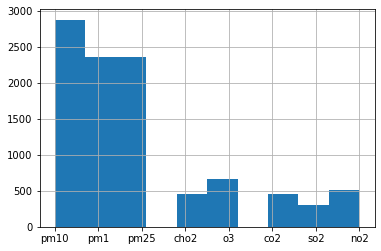

In [12]:
hist = df2.get('_source.Sensor').hist()

In [13]:
so2 = df2[df2.get('_source.Sensor') == 'so2']
so2.head(100)


,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
81,brasov-dev,_doc,gkABtn8Bwa_bL2zRKOuc,None,[1648022400000],Waqi,so2,2.7,45.654271,25.624061,1648022400000,µg/m3
86,brasov-dev,_doc,hkABtn8Bwa_bL2zRKesQ,None,[1648022400000],Waqi,so2,3.4,45.649117,25.604136,1648022400000,µg/m3
88,brasov-dev,_doc,iEABtn8Bwa_bL2zRKesR,None,[1648022400000],Waqi,so2,1.6,45.716700,25.633300,1648022400000,µg/m3
179,brasov-dev,_doc,0EDKtX8Bwa_bL2zRROp8,None,[1648018800000],Waqi,so2,4.1,45.654271,25.624061,1648018800000,µg/m3
184,brasov-dev,_doc,10DKtX8Bwa_bL2zRRuqN,None,[1648018800000],Waqi,so2,5.2,45.649117,25.604136,1648018800000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
3031,brasov-dev,_doc,wkBar38Bwa_bL2zRR9Vt,None,[1647910800000],Waqi,so2,2.5,45.649117,25.604136,1647910800000,µg/m3
3105,brasov-dev,_doc,70Ajr38Bwa_bL2zRV9SG,None,[1647907200000],Waqi,so2,1.6,45.716700,25.633300,1647907200000,µg/m3
3107,brasov-dev,_doc,80Ajr38Bwa_bL2zRV9Sn,None,[1647907200000],Waqi,so2,2.2,45.654271,25.624061,1647907200000,µg/m3
3114,brasov-dev,_doc,-UAjr38Bwa_bL2zRWdSk,None,[1647907200000],Waqi,so2,2.8,45.649117,25.604136,1647907200000,µg/m3


In [14]:
print('Lungime dataframe: ',len(df2))
print('Lungime dataframe pm 1: ',len(so2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  309


In [15]:
print(f"Number of no data values per column:\n{so2.isna().sum()}")

Number of no data values per column:
_index                    0
_type                     0
_id                       0
_score                  309
sort                      0
_source.Source            0
_source.Sensor            0
_source.Value             0
_source.LocationLat       0
_source.LocationLong      0
_source.TimeStamp         0
_source.Measurement       0
dtype: int64


In [16]:
# so2_v2 = so2.drop('_score', inplace=True, axis=1) #method 1
# so2_v2 = so2.drop('_score', axis=1) #method 2
# so2_v2 = so2.loc[:, pm1.columns != '_score'] #method3
so2_v2 = so2[[i for i in list(so2.columns) if i != '_score']] #method4
so2_v2.head(7)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
81,brasov-dev,_doc,gkABtn8Bwa_bL2zRKOuc,[1648022400000],Waqi,so2,2.7,45.654271,25.624061,1648022400000,µg/m3
86,brasov-dev,_doc,hkABtn8Bwa_bL2zRKesQ,[1648022400000],Waqi,so2,3.4,45.649117,25.604136,1648022400000,µg/m3
88,brasov-dev,_doc,iEABtn8Bwa_bL2zRKesR,[1648022400000],Waqi,so2,1.6,45.716700,25.633300,1648022400000,µg/m3
179,brasov-dev,_doc,0EDKtX8Bwa_bL2zRROp8,[1648018800000],Waqi,so2,4.1,45.654271,25.624061,1648018800000,µg/m3
184,brasov-dev,_doc,10DKtX8Bwa_bL2zRRuqN,[1648018800000],Waqi,so2,5.2,45.649117,25.604136,1648018800000,µg/m3
188,brasov-dev,_doc,0kDKtX8Bwa_bL2zRRup_,[1648018800000],Waqi,so2,1.4,45.716700,25.633300,1648018800000,µg/m3
272,brasov-dev,_doc,GkCTtX8Bwa_bL2zRSepi,[1648015200000],Waqi,so2,4.9,45.649117,25.604136,1648015200000,µg/m3


In [17]:
so2_v2.tail(7)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
9483,brasov-dev,_doc,O0CLoH8Bwa_bL2zR_6VH,[1647662400000],Waqi,so2,1.9,45.649117,25.604136,1647662400000,µg/m3
9552,brasov-dev,_doc,fkBVoH8Bwa_bL2zREKSV,[1647658800000],Waqi,so2,2.1,45.654271,25.624061,1647658800000,µg/m3
9557,brasov-dev,_doc,g0BVoH8Bwa_bL2zREqQ3,[1647658800000],Waqi,so2,1.6,45.716700,25.633300,1647658800000,µg/m3
9562,brasov-dev,_doc,iEBVoH8Bwa_bL2zREqRq,[1647658800000],Waqi,so2,1.8,45.649117,25.604136,1647658800000,µg/m3
9635,brasov-dev,_doc,zkAeoH8Bwa_bL2zRIKOI,[1647655200000],Waqi,so2,2.0,45.654271,25.624061,1647655200000,µg/m3
9640,brasov-dev,_doc,00AeoH8Bwa_bL2zRIKOo,[1647655200000],Waqi,so2,1.9,45.649117,25.604136,1647655200000,µg/m3
9643,brasov-dev,_doc,10AeoH8Bwa_bL2zRIqMF,[1647655200000],Waqi,so2,1.8,45.716700,25.633300,1647655200000,µg/m3


In [18]:
print('Lungime dataframe: ', len(df2))
print('Lungime dataframe pm 1: ', len(so2))
print('Lungime dataframe pm 1 - fara _score: ', len(so2_v2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  309
Lungime dataframe pm 1 - fara _score:  309


In [19]:
print(f"Number of no data values per column:\n{so2_v2.isna().sum()}")

Number of no data values per column:
_index                  0
_type                   0
_id                     0
sort                    0
_source.Source          0
_source.Sensor          0
_source.Value           0
_source.LocationLat     0
_source.LocationLong    0
_source.TimeStamp       0
_source.Measurement     0
dtype: int64


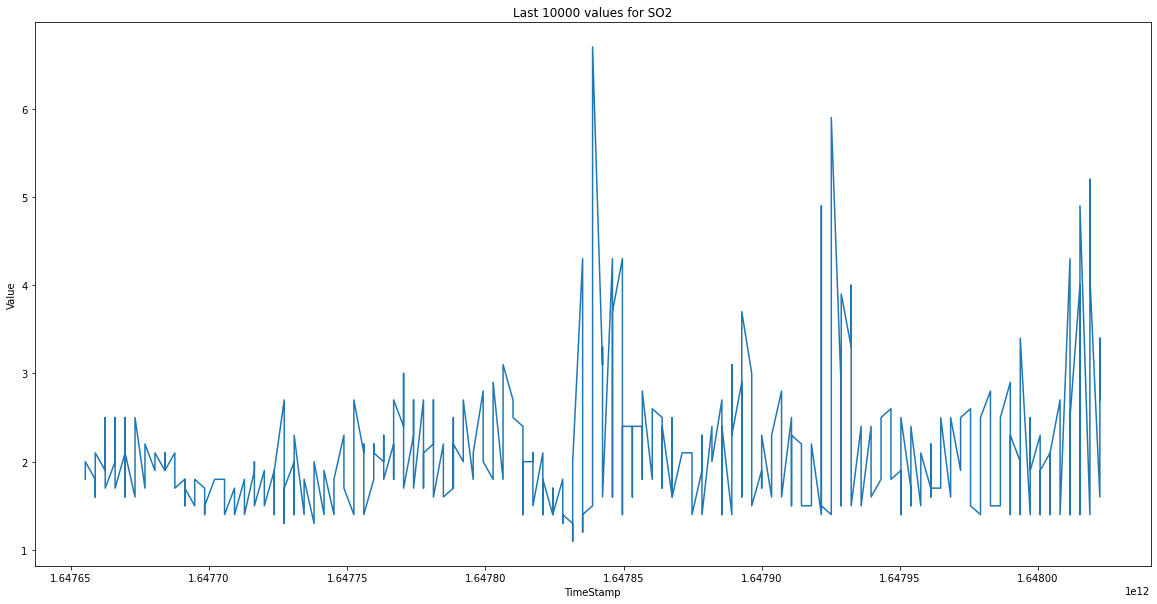

In [20]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2_v2.get('_source.TimeStamp'), so2_v2.get('_source.Value'))
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
# plt.savefig('plots/PM1.jpg', bbox_inches = 'tight')
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [22]:
X = so2_v2[["_source.TimeStamp"]].values
y = so2_v2[["_source.Value"]].values

In [23]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [24]:
y_pred = regressor.predict(X)

In [25]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  1.4396842922740626e-09
Intercept:  -2370.266414090641


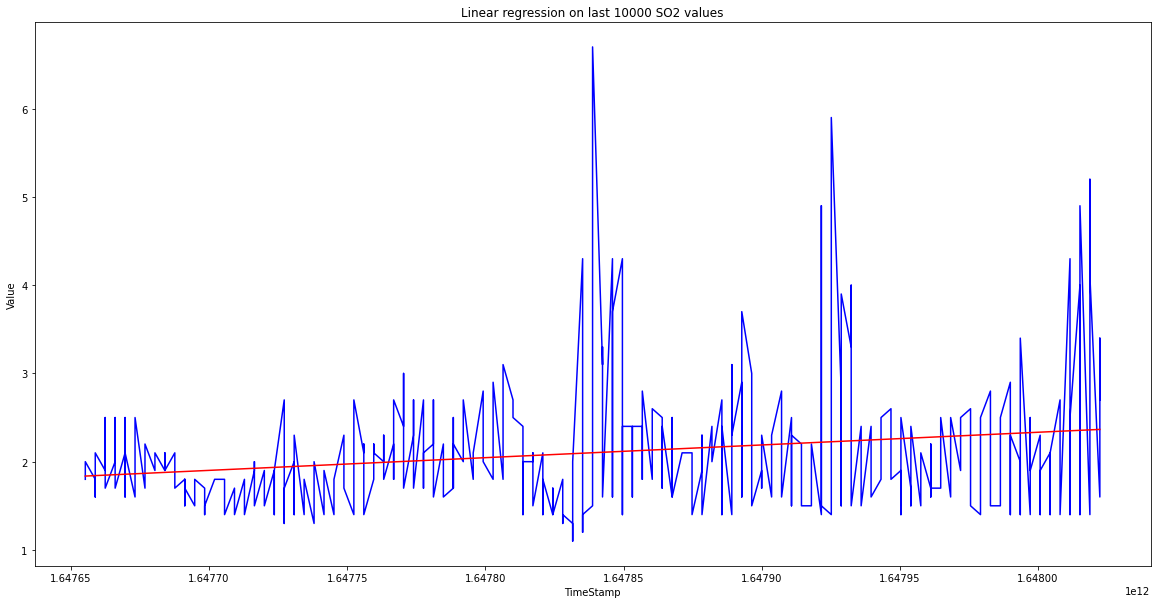

In [26]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Linear regression on last 10000 SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.show()

In [27]:
so2_v3 = so2_v2

In [28]:
so2_v3['LocationId'] = so2_v3['_source.LocationLat']*10000000 + so2_v3['_source.LocationLong']*10000000
so2_v3['LocationName'] = ""
so2_v3.loc[so2_v3['LocationId'] == 712532529.0, 'LocationName'] = 'Locatia1' 
so2_v3.loc[so2_v3['LocationId'] == 712783320.0, 'LocationName'] = 'Locatia2'
so2_v3.loc[so2_v3['LocationId'] == 713500000.0, 'LocationName'] = 'Locatia3'
so2_v3.head(9)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement,LocationId,LocationName
81,brasov-dev,_doc,gkABtn8Bwa_bL2zRKOuc,[1648022400000],Waqi,so2,2.7,45.654271,25.624061,1648022400000,µg/m3,712783320.0,Locatia2
86,brasov-dev,_doc,hkABtn8Bwa_bL2zRKesQ,[1648022400000],Waqi,so2,3.4,45.649117,25.604136,1648022400000,µg/m3,712532529.0,Locatia1
88,brasov-dev,_doc,iEABtn8Bwa_bL2zRKesR,[1648022400000],Waqi,so2,1.6,45.716700,25.633300,1648022400000,µg/m3,713500000.0,Locatia3
179,brasov-dev,_doc,0EDKtX8Bwa_bL2zRROp8,[1648018800000],Waqi,so2,4.1,45.654271,25.624061,1648018800000,µg/m3,712783320.0,Locatia2
184,brasov-dev,_doc,10DKtX8Bwa_bL2zRRuqN,[1648018800000],Waqi,so2,5.2,45.649117,25.604136,1648018800000,µg/m3,712532529.0,Locatia1
188,brasov-dev,_doc,0kDKtX8Bwa_bL2zRRup_,[1648018800000],Waqi,so2,1.4,45.716700,25.633300,1648018800000,µg/m3,713500000.0,Locatia3
272,brasov-dev,_doc,GkCTtX8Bwa_bL2zRSepi,[1648015200000],Waqi,so2,4.9,45.649117,25.604136,1648015200000,µg/m3,712532529.0,Locatia1
276,brasov-dev,_doc,HkCTtX8Bwa_bL2zRSepr,[1648015200000],Waqi,so2,1.4,45.716700,25.633300,1648015200000,µg/m3,713500000.0,Locatia3
279,brasov-dev,_doc,IkCTtX8Bwa_bL2zRSeps,[1648015200000],Waqi,so2,4.0,45.654271,25.624061,1648015200000,µg/m3,712783320.0,Locatia2
